# Функции

##1.1

Постройте график функции и её производной первого порядка. Также найдите точки экстремума функции, отметьте их на графике другим цветом. Вычисления проведите вручную и приложите скрин расчетов.

$f(x) = (x^2-2x)ln(x)-1.5x^2+4x$


$ \left(\left({x}^{2}-2\,x\right)\,\ln\left(x\right)-\dfrac{3\,{x}^{2}}{2}+4\,x\right)'$

$\left(\left({x}^{2}-2\,x\right)\,\ln\left(x\right)\right)'-\dfrac{3}{2}\cdot \left({x}^{2}\right)'+4\cdot \left(x\right)'$

$ \left({x}^{2}-2\,x\right)'\cdot \ln\left(x\right)+\left(\ln\left(x\right)\right)'\cdot \left({x}^{2}-2\,x\right)-\dfrac{3}{2}\cdot 2\cdot x+4\cdot 1 $

$ \left(\left({x}^{2}\right)'-2\cdot \left(x\right)'\right)\cdot \ln\left(x\right)+\dfrac{1}{x}\cdot \left({x}^{2}-2\,x\right)+4-3\,x $

$ \left(2\cdot x-2\cdot 1\right)\cdot \ln\left(x\right)+\dfrac{{x}^{2}-2\,x}{x}-3\,x+4 $

$ \left(2\,x-2\right)\,\ln\left(x\right)+\dfrac{{x}^{2}-2\,x}{x}-3\,x+4 $

In [9]:
import math

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return (x ** 2 - 2 * x) * np.log(x) - 1.5 * (x ** 2) + 4 * x

def f_dx(x):
    return (2 * x - 2)*np.log(x) + ((x ** 2 - 2 * x) / x) - 3 * x + 4


x_values = np.linspace(0.1, 5, 100)

##1.2

Найдите частные производные функции $f(x, y, z) = 15x^2 + exp(x^2 + y^3)*cos(z)$ с помощью [SymPy](https://www.geeksforgeeks.org/python-sympy-diff-method/)

In [3]:
import sympy
x, y, z = sympy.symbols("x y z")
f_xyz = 15 * (x ** 2) + sympy.exp((x ** 2) + (y ** 3)) * sympy.cos(z)
print("Partial derivative w.r.t x: {}".format(sympy.diff(f_xyz, x)))
print("Partial derivative w.r.t y: {}".format(sympy.diff(f_xyz, y)))
print("Partial derivative w.r.t z: {}".format(sympy.diff(f_xyz, z)))

Partial derivative w.r.t x: 2*x*exp(x**2 + y**3)*cos(z) + 30*x
Partial derivative w.r.t y: 3*y**2*exp(x**2 + y**3)*cos(z)
Partial derivative w.r.t z: -exp(x**2 + y**3)*sin(z)


##2

Не всегда значения функций возможно рассчитать напрямую, однако их можно вычислить приближенно, используя, например, ряды Тейлора. Реализуйте расчет $e^x$. Сравните значения, получаемые с различной точностью приближения (5, 10, 15), с numpy-реализацией. Постройте график, отобразив на нём все четыре линии.

In [52]:
x_values = np.linspace(-10, 10, 100)

In [53]:
def exp_taylor(x: np.ndarray, terms=5):
    res = np.zeros_like(x)
    for i in range(terms):
        res += x ** i / float(math.factorial(i))
    return res

In [54]:
exp_t_5 = exp_taylor(x_values)
exp_t_10 = exp_taylor(x_values, terms=10)
exp_t_15 = exp_taylor(x_values, terms=15)

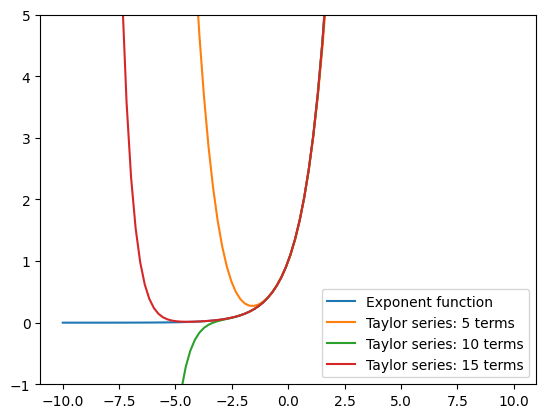

In [55]:
fig, ax = plt.subplots()
ax.plot(x_values, np.exp(x_values))
ax.plot(x_values, exp_t_5)
ax.plot(x_values, exp_t_10)
ax.plot(x_values, exp_t_15)
ax.set_ylim([-1, 5])
ax.legend(["Exponent function",
           "Taylor series: 5 terms",
           "Taylor series: 10 terms",
           "Taylor series: 15 terms"])

##3

Рассмотрите две следующие функции, часто использующиеся как функции потерь (то есть они помогают оценить качество предсказаний модели).

$MAE (Mean\ Absolute\ Error) = \frac{1}{n} \sum_{i=1}^{n} |y_i - \widehat{y}_i|$

$MSE (Mean\ Squared\ Error) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \widehat{y}_i)^2$

Письменно ответьте на вопросы:

1. Какая проблема присуща MAE с точки зрения дифференцирования?

2. Если в качестве $\widehat{y}_i$ всегда будет предсказываться константное значение, каким оно должно быть, чтобы минимизировать значение каждой из функций?


1. MAE не дифференцируема в точке 0 (если $y_{true} = y_{pred}$).
2. $\widehat{y}_i$ должно быть как можно ближе к значению дисперсии целевой переменной.

# Матрицы. Векторы

##1

Реализуйте следующие паттерны. Не используйте циклы! Все матрицы квадратные со стороной длины n. Примеры приведены для n=5.

1. Шахматная доска
```
[[0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]]
 ```
2. Полоса шириной 3 относительно главной диагонали
```
[[1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]]
 ```
3. Кайма из единиц
```
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]
 ```
4. Полосы
```
[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
 ```
5. Верхний треугольник
```
[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]
 ```


In [62]:
def chessboard(n):
    chess = np.zeros((n, n))
    chess[1::2, ::2] = 1
    chess[::2, 1::2] = 1
    return chess
chessboard(5)

array([[0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.]])

In [67]:
def diag_lane(n):
    lane = np.diag(np.ones(n), k = 0)
    np.fill_diagonal(lane[1:, :], np.ones(n))
    np.fill_diagonal(lane[:, 1:], np.ones(n))
    return lane
diag_lane(5)

array([[1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.]])

In [71]:
def border(n):
    brd = np.zeros((n, n))
    brd[:, [0, -1]] = 1
    brd[[0, -1], :] = 1
    return brd
border(5)

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

In [75]:
def stripes(n):
    striped = np.zeros((n, n))
    striped[1::2] = np.ones(n)
    return striped
stripes(5)

array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.]])

In [76]:
def up_triangle(n):
    utri = np.ones((n, n))
    return np.triu(utri)
up_triangle(5)

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

##2

Пусть дан вектор следующего вида. Преобразуйте его, чтобы получить две матрицы: первая должна содержать одинаковые значения column-wise (столбец целиком из нулей, столбец целиком из единиц и так далее), а вторая - row-wise. Не используйте циклы.

In [77]:
n = 5
vector = np.hstack([[i for i in range(n)] for _ in range(n)])  # также существуют vstack и dstack
print(vector)

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]


In [89]:
np.tile(vector, (n, 1))

array([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4],
       [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4],
       [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4],
       [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4],
       [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4]])

In [88]:
np.tile(vector, (n, 1)).transpose()

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

# Теория вероятностей

##1

Постройте графики плотности распределений для следующих распределений:

* Биномиальное распределение
* Геометрическое распределение
* Равномерное распределение
* Нормальное распределение
* Логнормальное распределение

Параметры распределений выберите произвольно. Подумайте, какие явления в реальном мире подчиняются тому или иному распределению.

Отобразите также следующие статистические показатели: выборочное среднее, мода, медиана, стандартное отклонение.

In [101]:
import seaborn as sns

Text(1, 1.15, 'Stddev: 0.49749371855331004')

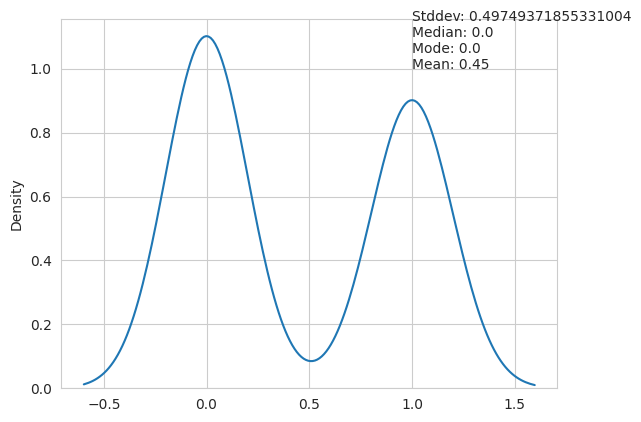

In [119]:
data = np.random.binomial(1, 0.5, size=(100,))
mean = np.mean(data)
vals, cnts = np.unique(data, return_counts=True)
mode = vals[cnts.argmax()]
median = np.median(data)
std = np.std(data)
sns.set_style("whitegrid")
ax = sns.kdeplot(data)
ax.text(1, 1, f"Mean: {np.mean(data)}")
ax.text(1, 1.05, f"Mode: {np.mean(mode)}")
ax.text(1, 1.10, f"Median: {np.mean(median)}")
ax.text(1, 1.15, f"Stddev: {np.mean(std)}")

Пример: количество произошедших случайных событий в выборке (к примеру, количество пациентов с побочной реакцией на лекарство).

Text(1, 0.56, 'Stddev: 1.2359207094308275')

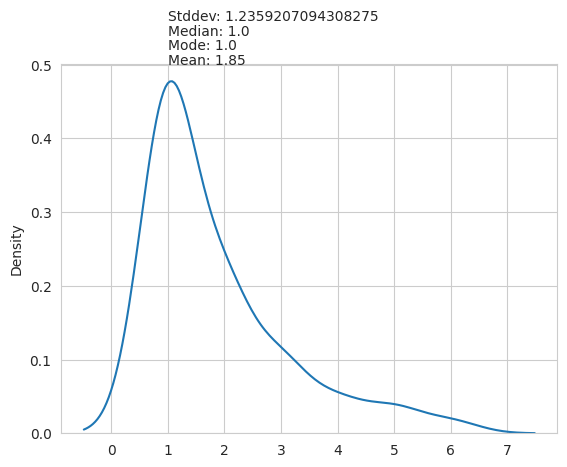

In [136]:
data = np.random.geometric(0.5, size=(100,))
mean = np.mean(data)
vals, cnts = np.unique(data, return_counts=True)
mode = vals[cnts.argmax()]
median = np.median(data)
std = np.std(data)
sns.set_style("whitegrid")
ax = sns.kdeplot(data)
ax.text(1, 0.5, f"Mean: {np.mean(data)}")
ax.text(1, 0.52, f"Mode: {np.mean(mode)}")
ax.text(1, 0.54, f"Median: {np.mean(median)}")
ax.text(1, 0.56, f"Stddev: {np.mean(std)}")

Пример: вероятность того, что событие произойдёт с N-ного раза (например, количество бросков монеты до первого орла).

Text(1, 1.15, 'Stddev: 0.28124741059323305')

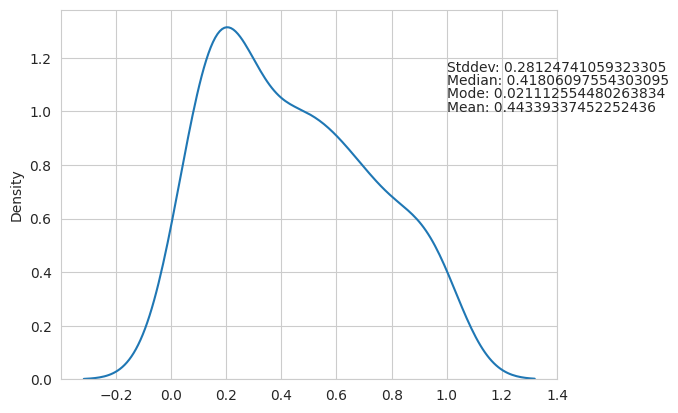

In [137]:
data = np.random.uniform(size=(100,))
mean = np.mean(data)
vals, cnts = np.unique(data, return_counts=True)
mode = vals[cnts.argmax()]
median = np.median(data)
std = np.std(data)
sns.set_style("whitegrid")
ax = sns.kdeplot(data)
ax.text(1, 1, f"Mean: {np.mean(data)}")
ax.text(1, 1.05, f"Mode: {np.mean(mode)}")
ax.text(1, 1.10, f"Median: {np.mean(median)}")
ax.text(1, 1.15, f"Stddev: {np.mean(std)}")

Пример: каждое значение в интервале равновероятно (к примеру, вероятность выпадения дня рождения человека на конкретную дату равномерно распределена).

Text(1, 0.56, 'Stddev: 0.9419866657663625')

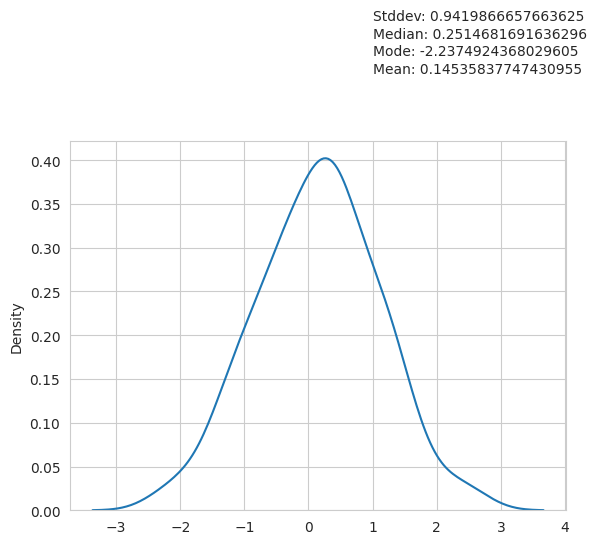

In [140]:
data = np.random.normal(size=(100,))
mean = np.mean(data)
vals, cnts = np.unique(data, return_counts=True)
mode = vals[cnts.argmax()]
median = np.median(data)
std = np.std(data)
sns.set_style("whitegrid")
ax = sns.kdeplot(data)
ax.text(1, 0.5, f"Mean: {np.mean(data)}")
ax.text(1, 0.52, f"Mode: {np.mean(mode)}")
ax.text(1, 0.54, f"Median: {np.mean(median)}")
ax.text(1, 0.56, f"Stddev: {np.mean(std)}")

Пример: распределение величины, являющейся суммой или близкой к сумме слабо связанных случайных величин (гауссовой случайной величины), например, масса тела, IQ, рост, баллы на экзаменах и т.п при достаточно большой выборке.

Text(1, 0.42, 'Stddev: 1.70594108603588')

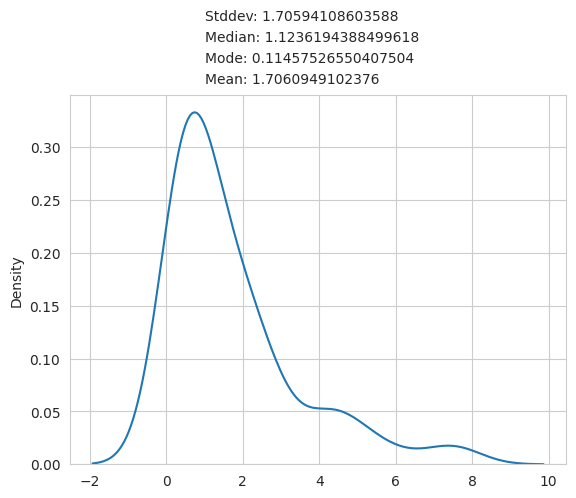

In [147]:
data = np.random.lognormal(size=(100,))
mean = np.mean(data)
vals, cnts = np.unique(data, return_counts=True)
mode = vals[cnts.argmax()]
median = np.median(data)
std = np.std(data)
sns.set_style("whitegrid")
ax = sns.kdeplot(data)
ax.text(1, 0.36, f"Mean: {np.mean(data)}")
ax.text(1, 0.38, f"Mode: {np.mean(mode)}")
ax.text(1, 0.40, f"Median: {np.mean(median)}")
ax.text(1, 0.42, f"Stddev: {np.mean(std)}")

Примеры: распределение экспоненты от гауссовой случайной величины, например, количество слов в предложении, или концентрация редких элементов в горных породах.

Подумайте, в каких случаях медиана предпочтительнее среднего при расчете "средней температуры по больнице". Какие модификации можно было бы произвести для формулы среднего или для выборки, чтобы среднее значение стало более репрезентативно в подобных случаях? Напишите ответ.

Медиану лучше использовать вместо среднего в тех случаях, когда в "хвостах" распределения значения переменной намного выше, чем в "середине" (например, для распределения заработной платы).

Модификации среднего зависят от конкретной ситуации, например, возможно использования взвешенного среднего (каждому значению назначается вес и значение домножается на него, после чего полученное делится на сумму весов) или, например, в финансовой сфере часто используется скользящее среднее (среднее значение берётся на некотором указанном отрезке).

##2 (2 балла)

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

 Рассчитайте вероятности, а также смоделируйте ситуацию и оцените эмпирическое распределение.

In [197]:
def binomial_coef(n, m):
  return math.factorial(n) / (math.factorial(n - m) * math.factorial(m))

def bernoulli(p, m, n):
  return binomial_coef(n, m) * (p ** m) * ((1 - p) ** (n - m))

In [209]:
# 1
at_least_one_10 = 1 - bernoulli(0.5 ** 10, 0, 1000)
print(at_least_one_10)

0.623576201943276


In [210]:
# 2
p_only_8 = 0.5 ** 8
p_only_9 = 0.5 ** 9

p_at_least_8 = p_only_8 + p_only_9 + 0.5 ** 10
at_least_one_8 = 1 - bernoulli(p_at_least_8, 0, 1000)
print(at_least_one_8)

0.9989504665542001


In [211]:
# 3
exact_3_10 = bernoulli(0.5 ** 10, 3, 1000)
print(exact_3_10)

0.05842449273238755


##3 (2 балла)

В магазин поступила новая продукция с трех предприятий. Процентный состав этой продукции следующий: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта. Если известно, что купленная продукция высшего сорта, какова вероятность, что она была куплена на втором предприятии?

Решите задачу в общем случае для N предприятий, где доля продукции каждого составляет $a_i$, а доля продукции высшего сорта на каждом составляет $b_i$. Напишите функцию, принимающую на вход два списка: a и b, а также n - номер предприятия, для которого необходимо узнать вероятность, что продукция высшего сорта была куплена именно на нём (нумерация с единицы). Функция должна возвращать две вероятности.

In [331]:
def bayes_proba(a, b, n):
    p_b_given_an = a[n] * b[n]
    p_an_given_b = p_b_given_an * a[n] / np.sum(b)
    return p_an_given_b, p_b_given_an

In [332]:
bayes_proba([0.2, 0.3, 0.5], [0.1, 0.05, 0.2], 2)

(0.14285714285714285, 0.1)

# Методы оптимизации (3 балла)



(Задание взято у Яндекса)

Дана функция $f(x) = (a\sin(x) + b\ln(x))^2 + cx^2$ и файл, содержащий пары (x, f(x)). Необходимо с точностью до трёх знаков после запятой подобрать коэффициенты a, b, c исходной функции. Для решения задачи предлагается использовать градиентный спуск и функцию потерь MSE.

P.S. на предоставленном наборе данных возможно получить MSE < 0.00001, ориентируйтесь на эту цифру.

In [161]:
!pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [162]:
!gdown 1P5REbDVMtoHk_EPOaXzFWym2sMKhhbg3

Downloading...
From: https://drive.google.com/uc?id=1P5REbDVMtoHk_EPOaXzFWym2sMKhhbg3
To: /content/data.txt
100% 27.0k/27.0k [00:00<00:00, 37.6MB/s]


In [318]:
with open('data.txt', 'r') as file:
    x_data = []
    y_data = []
    for para in eval(file.read()):
        x_data.append(para[0])
        y_data.append(para[1])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [317]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2, axis=0)

In [319]:
def gradient_descent(X, y, lr=0.05, epoch=10):
    m, b = 0.33, 0.48 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples

    for _ in range(epoch):
        f = y - (m * X + b)

        m -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)

        log.append((m, b))
        mse.append(mean_squared_error(y, (m*X + b)))

    return m, b, log, mse

In [320]:
m, b, log, mse = gradient_descent(x_data, y_data, lr=3e-3, epoch=1000)

In [321]:
y_pred = m * x_data + b

In [322]:
mean_squared_error(y_data, y_pred)

189.68409347410585

Для сравнения, `SGDRegressor` из `sklearn` при обучении со стандартными гиперпараметрами даёт примерно такую же MSE, следовательно, дальнейшие попытки развития модели можно считать малопродуктивными.

In [323]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [325]:
skl_model = SGDRegressor()
skl_model.fit(x_data.reshape(-1, 1), y_data)

SGDRegressor()

In [327]:
mean_squared_error(y_data, skl_model.predict(x_data.reshape(-1, 1)))

189.73866727249458